In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


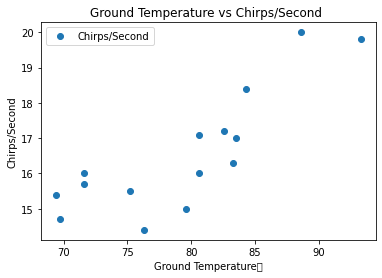

In [5]:
df.plot(x='Ground Temperature',y='Chirps/Second',style='o')
plt.title('Ground Temperature vs Chirps/Second ')
plt.xlabel('Ground Temperature	')
plt.ylabel('Chirps/Second')
plt.show()

In [6]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [7]:
x=df[['Ground Temperature']].values
y=df['Chirps/Second'].values
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)
xtrain

array([[84.3],
       [71.6],
       [79.6],
       [71.6],
       [80.6],
       [93.3],
       [69.7],
       [76.3],
       [83.5],
       [69.4]])

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)


In [9]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(xtrain,ytrain)
print(regressor.intercept_)
print(regressor.coef_)

16.240000000000002
[1.32929429]


In [10]:
ypred=regressor.predict(xtest)
print(ytest,ypred)

[17.2 17.1 15.5 20.  16.3] [17.07314352 16.71169297 15.73577648 18.15749516 17.19965121]


In [11]:
from sklearn import metrics
print(metrics.mean_absolute_error(ytest,ypred),metrics.mean_squared_error(ytest,ypred),metrics.r2_score(ytest,ypred))

0.6986192096619466 0.8853323688421874 0.6166728572730398


In [12]:
#extrapolate
regressor.predict(scaler.fit_transform([[95]]))

array([16.24])

In [13]:
#intrapolate derived from y=mx+c --> x=(y-c)/m
(18-regressor.intercept_)/regressor.coef_
scaler.inverse_transform([(18-regressor.intercept_)/regressor.coef_])

array([[96.32401081]])

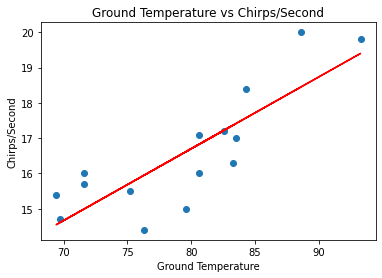

In [14]:
regressor.fit(x,y)
plt.scatter(df['Ground Temperature'],df['Chirps/Second'])
plt.plot(x,regressor.predict(x),color='r')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [91]:
df = pd.read_fwf("brain_body.txt")

In [93]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [94]:
x=df['Body']
x=x.to_frame()
y=df['Brain']


In [95]:
s=np.array(df['Body'].values)
q1=np.quantile(s,0.25)
q3=np.quantile(s,0.75)
iqr=q3-q1
outliers=(q3)+(1.5*iqr)
print(outliers)

408.625


In [96]:
s=np.array(df['Body'].values)
q1=np.quantile(s,0.25)
q3=np.quantile(s,0.75)
iqr=q3-q1
outliers=(q1)-(1.5*iqr)
print(outliers)

-238.375


In [97]:
s=np.array(df['Brain'].values)
q1=np.quantile(s,0.25)
q3=np.quantile(s,0.75)
iqr=q3-q1
outliers=(q3)+(1.5*iqr)
print(outliers)

119.60625


In [98]:
s=np.array(df['Brain'].values)
q1=np.quantile(s,0.25)
q3=np.quantile(s,0.75)
iqr=q3-q1
outliers=(q1)-(1.5*iqr)
print(outliers)

-70.80375000000001


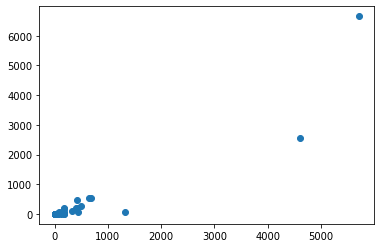

In [99]:
plt.scatter(x,y)

In [100]:
df=df[(df['Body']<408.625) & (df['Brain']<119.60625)]
df

,Brain,Body
0,3.385,44.50
1,0.480,15.50
2,1.350,8.10
4,36.330,119.50
5,27.660,115.00
6,14.830,98.20
7,1.040,5.50
8,4.190,58.00
9,0.425,6.40
10,0.101,4.00


In [101]:
x=df.iloc[:,1:].values
y=df.iloc[:,:1].values


In [102]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)



In [103]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

In [104]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(xtrain,ytrain)
print(regressor.intercept_)
print(regressor.coef_)

[9.78888571]
[[16.30127056]]


In [105]:
ypred=regressor.predict(xtest)
print(ytest,ypred)

[[3.500e+00]
 [1.220e-01]
 [1.055e+01]
 [9.200e-01]
 [3.000e+00]
 [2.766e+01]
 [4.800e-02]
 [2.500e+00]
 [7.850e-01]
 [1.400e+00]
 [1.000e+02]
 [6.000e-02]
 [4.190e+00]
 [1.350e+00]
 [2.300e-02]] [[ 2.35395369e+00]
 [ 4.87512216e-01]
 [ 4.27217328e+01]
 [ 1.13358811e+00]
 [ 5.75183433e+00]
 [ 2.72876975e+01]
 [-1.51385059e-01]
 [ 2.66502727e+00]
 [ 6.07155900e-01]
 [ 2.76074222e+00]
 [ 3.73377670e+01]
 [ 8.93747828e-03]
 [ 1.36483175e+01]
 [ 1.70787780e+00]
 [-1.58563680e-01]]


In [106]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))#y_test = truevalue, y_pred=predicted value
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred))
print('R2- SCORE:', metrics.r2_score(ytest,ypred))

Mean Absolute Error: 7.4423379593269585
Mean Squared Error: 337.4902221869253
R2- SCORE: 0.45578109691821567


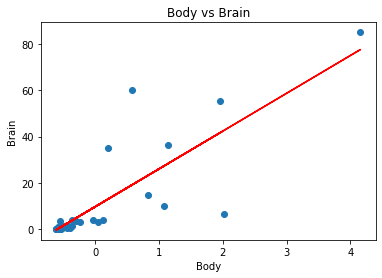

In [107]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,regressor.predict(xtrain),color='r')
plt.title('Body vs Brain')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

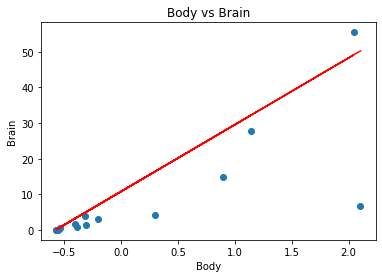

In [70]:
plt.scatter(xtest,ytest)
plt.plot(xtest,regressor.predict(xtest),color='r')
plt.title('Body vs Brain')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [110]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [111]:
df.head(3)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200


In [112]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [113]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [114]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [115]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [116]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [117]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [118]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [119]:
x=df[['Sex','Rank','Year','Degree','YSdeg']]


y=df.iloc[:,-1]

x.head(3)
y.head(3)

0    36350
1    35350
2    28200
Name: Salary, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=12)
xtrain.head()


,Sex,Rank,Year,Degree,YSdeg
19,0,3,6,0,21
4,0,3,19,0,30
8,0,3,13,0,30
1,0,3,13,1,22
15,0,3,7,1,15


In [121]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

In [122]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(xtrain,ytrain)
print(regressor.intercept_)
print(regressor.coef_)

24906.410256410258
[ 691.62662568 4124.94572463 2595.12963009 -216.88116316 -466.82096317]


In [123]:
ypred=regressor.predict(xtest)
print(ytest,ypred)

39    17600
48    16244
21    20525
7     31909
24    24832
17    24742
28    26182
36    18304
46    16150
38    16700
43    17250
33    20690
50    15000
Name: Salary, dtype: int64 [17333.11479966 16106.0256414  23143.41688568 31819.14258931
 24070.11979177 25340.29787692 22019.5705299  20319.84731257
 17962.64817934 17284.62520801 18565.63626536 22857.91164322
 17747.57682652]


In [124]:
from sklearn import metrics
print(metrics.mean_absolute_error(ytest,ypred),metrics.mean_squared_error(ytest,ypred),metrics.r2_score(ytest,ypred))

1483.0759111984928 3606901.9543622085 0.8461412308236359


Feature Selection

According to this multiple Linear Regression Model(Checking the coefficients), Sex is predicted to be one of the feature that influences the salary.
